In [108]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
conn = sqlite3.connect("factbook.db")

q = "select* from sqlite_master where type='table';"
pd.read_sql_query(q, conn)


type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [109]:
first_five = "select* from facts limit 5"
pd.read_sql_query(first_five, conn)


id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [110]:
## Query that returns the minimum, maximum population and population growth

In [111]:
min_pop_growth = "select min(population_growth) from facts;"
pd.read_sql_query(min_pop_growth, conn)

min(population_growth)
0                     0.0

In [112]:
max_pop_growth = "select max(population_growth) from facts;"
pd.read_sql_query(max_pop_growth, conn)

max(population_growth)
0                    4.02

In [113]:
min_pop = "select min(population) from facts;"
pd.read_sql_query(min_pop, conn)

min(population)
0                0

In [114]:
max_pop = "select max(population) from facts;"
pd.read_sql_query(max_pop, conn)

max(population)
0       7256490011

In [115]:
pop = "select min(population) as 'min_pop', max(population) as 'max_pop', min(population_growth) as 'min_pop_growth', max(population_growth) as 'max_pop_growth' from facts;"
pd.read_sql_query(pop, conn)

min_pop     max_pop  min_pop_growth  max_pop_growth
0        0  7256490011             0.0            4.02

In [116]:
## We need to why a country has 0 population and another has over 7billion people

In [117]:
pop_zero = "select*from facts where population = 0;"
pd.read_sql_query(pop_zero, conn)

id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  
0              None       None       None           None

In [118]:
pop_too_high = "select*from facts where population = 7256490011;"
pd.read_sql_query(pop_too_high, conn)

id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate  
0        18.6         7.8           None

In [119]:
## It appears that there are issues with some few rows 'world' and 'Antartica'

In [120]:
gen_hist = "select population, population_growth, birth_rate, death_rate from facts"
pd.read_sql_query(gen_hist, conn)

population  population_growth  birth_rate  death_rate
0    3.256434e+07               2.32       38.57       13.89
1    3.029278e+06               0.30       12.92        6.58
2    3.954217e+07               1.84       23.67        4.31
3    8.558000e+04               0.12        8.13        6.96
4    1.962535e+07               2.78       38.78       11.49
5    9.243600e+04               1.24       15.85        5.69
6    4.343189e+07               0.93       16.64        7.33
7    3.056382e+06               0.15       13.61        9.34
8    2.275101e+07               1.07       12.15        7.14
9    8.665550e+06               0.55        9.41        9.42
10   9.780780e+06               0.96       16.64        7.07
11   3.245970e+05               0.85       15.50        7.05
12   1.346613e+06               2.41       13.66        2.69
13   1.689577e+08               1.60       21.14        5.61
14   2.906040e+05               0.31       11.87        8.44
15   9.589689e+06               0.20       10.70       13.36
16   1.132397e+07               0.76       11.41        9.63
17   3.473690e+05               1.87       24.68        5.97
18   1.044865e+07               2.78       36.02        8.21
19   7.419190e+05               1.11       17.78        6.69
20   1.080088e+07               1.56       22.76        6.52
21   3.867055e+06               0.13        8.87        9.75
22   2.182719e+06               1.21       20.96       13.39
23   2.042598e+08               0.77       14.46        6.58
24   4.296460e+05               1.62       17.32        3.52
25   7.186893e+06               0.58        8.92       14.44
26   1.893169e+07               3.03       42.03       11.72
27   5.632021e+07               1.01       18.39        7.96
28   1.074228e+07               3.28       42.01        9.27
29   1.570876e+07               1.58       23.83        7.68
..            ...                ...         ...         ...
231  3.361000e+03               0.01       10.90        4.90
232  2.925800e+04               0.24       14.08        8.37
233  6.608000e+04               0.34        9.84        8.78
234  9.729400e+04               0.80       11.91        7.68
235  8.754500e+04               0.76       11.10       10.06
236  5.241000e+03               0.50       11.26        6.30
237  4.800000e+01               0.00         NaN         NaN
238  7.795000e+03               0.24        9.88        7.44
239           NaN                NaN         NaN         NaN
240  5.028000e+04               2.30       16.13        3.10
241  5.434300e+04               0.30       22.89        4.75
242  1.617850e+05               0.54       16.82        5.12
243           NaN                NaN         NaN         NaN
244  5.234400e+04               2.18       18.32        3.71
245  3.598357e+06               0.60       10.86        8.67
246  1.035740e+05               0.59       10.31        8.54
247           NaN                NaN         NaN         NaN
248           NaN                NaN         NaN         NaN
249  0.000000e+00                NaN         NaN         NaN
250  1.869055e+06               2.81       31.11        3.04
251           NaN                NaN         NaN         NaN
252           NaN                NaN         NaN         NaN
253  2.785366e+06               1.95       22.99        3.50
254  5.708660e+05               2.82       30.24        8.34
255           NaN                NaN         NaN         NaN
256           NaN                NaN         NaN         NaN
257           NaN                NaN         NaN         NaN
258           NaN                NaN         NaN         NaN
259           NaN                NaN         NaN         NaN
260  7.256490e+09               1.08       18.60        7.80

[261 rows x 4 columns]

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


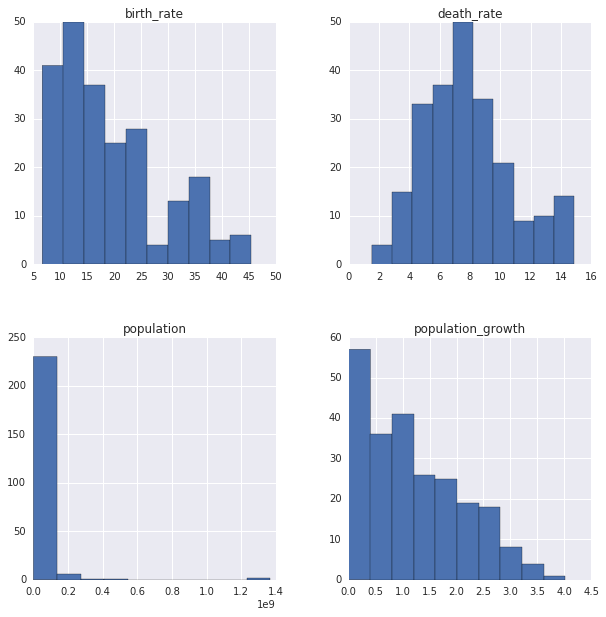

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

final = "select population, population_growth, birth_rate, death_rate from facts where population != (select max(population) from facts ) and population != (select min(population) from facts);"
pd.read_sql_query(final,conn).hist(ax=ax)
plt.show()


In [128]:
# country with the highest ratios of water to land?

In [132]:
hydro = "select name, CAST(area_water as float)/CAST(area_land as float) as 'ratios_water_to_land' from facts order by ratios_water_to_land desc limit 10;"
pd.read_sql_query(hydro, conn)

name  ratios_water_to_land
0  British Indian Ocean Territory            905.666667
1                  Virgin Islands              4.520231
2                     Puerto Rico              0.554791
3                    Bahamas, The              0.386613
4                   Guinea-Bissau              0.284673
5                          Malawi              0.259396
6                     Netherlands              0.225710
7                          Uganda              0.222922
8                         Eritrea              0.164356
9                         Liberia              0.156240